In [1]:
# step 1 corpus bigram tokenize

In [6]:
from nltk.corpus import movie_reviews
from nltk.util import ngrams

sentences = []
for tokens in movie_reviews.sents():
    bigram = ngrams(tokens, 2, pad_left=True, pad_right = True, left_pad_symbol= "SS", right_pad_symbol = "SE")# Sentnece Start , Sentece End
    sentences += [t for t in bigram]

sentences[:17]

[('SS', 'plot'),
 ('plot', ':'),
 (':', 'two'),
 ('two', 'teen'),
 ('teen', 'couples'),
 ('couples', 'go'),
 ('go', 'to'),
 ('to', 'a'),
 ('a', 'church'),
 ('church', 'party'),
 ('party', ','),
 (',', 'drink'),
 ('drink', 'and'),
 ('and', 'then'),
 ('then', 'drive'),
 ('drive', '.'),
 ('.', 'SE')]

In [20]:
# step 2 conditionalFreqDist Class object 

from nltk import ConditionalFreqDist
cfd = ConditionalFreqDist(sentences)

In [21]:
# 문장처음에 올수 있는 단어들

cfd["SS"].most_common(5)

[('the', 8071), ('.', 3173), ('it', 3136), ('i', 2471), ('but', 1814)]

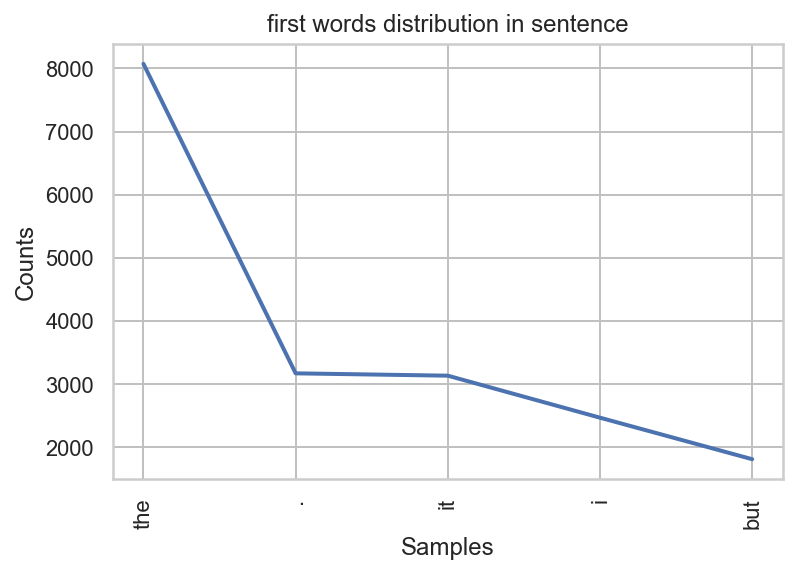

In [22]:
cfd["SS"].plot(5, title="first words distribution in sentence")
plt.show()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [23]:
# i 다음에 올 수 있는 단어들
cfd["i"].most_common(5)

[("'", 1357), ('was', 506), ('can', 351), ('have', 330), ('don', 276)]

In [24]:
# i 다음에 올 수 있는 단어들
cfd["."].most_common(5)

[('SE', 63404), ('"', 1854), (')', 535), ("'", 70), (']', 10)]

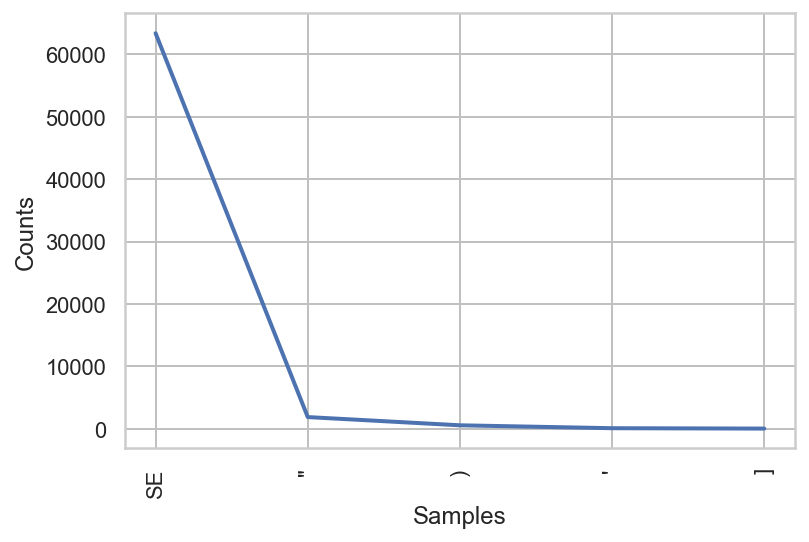

In [25]:
cfd["."].plot(5)
plt.show()

In [34]:
# step 3 조건부 확률추정 conditional probability estimation

from nltk.probability import ConditionalProbDist, MLEProbDist
cpd = ConditionalProbDist(cfd, MLEProbDist)

In [35]:
# 학습이 끝나면 조건부 확률의 값을 보거나 샘플 문장을 입력해서 문장의 로그 확률을 구할 수 있다. 
cpd["i"].prob("am") # i am 말이 된다 - 높은 확률

0.018562267971650354

In [36]:
cpd["we"].prob("is") # we is 말이 안된다 - 낮은 확률

0.0

In [ ]:
# 이렇게 조건부 확률을 알게 되면 각 문장이 확률을 구할 수 있다.

𝑃(SS I am a boy SE)=𝑃(I|SS)⋅𝑃(am|I)⋅𝑃(a|am)⋅𝑃(boy|a)⋅𝑃(.|boy)⋅𝑃(SE|.)

In [43]:
def sentence_score(s):
    p = 0.0
    for i in range(len(s) - 1):
        c = s[i]
        w = s[i + 1]
        p += np.log(cpd[c].prob(w) + np.finfo(float).eps)# 로그입력값 0 일시 에러발생 방지용 아주작은 eps실수 더함
    return np.exp(p)

In [40]:
test_sentence = ["i", "like", "the", "movie", "."]
sentence_score(test_sentence) # 백만분의 2의 확률

2.740764134071561e-06

In [41]:
test_sentence = ["like", "i", "the", ".", "movie"]
sentence_score(test_sentence)

1.5015040140827832e-38

In [47]:
# step 5 ramdom sentence create!

def generate_sentence(seed=None):
    if seed is not None:
        import random
        random.seed(seed)
    c = "SS"
    sentence = []
    while True:
        if c not in cpd:
            break
        w = cpd[c].generate()

        if w == "SE":
            break
        
        else:
            w2 = w

        if c == "SS":
            sentence.append(w2.title())
        
        else:
            sentence.append(" " + w2)

        c = w
    return "".join(sentence)

In [49]:
generate_sentence()

'Her hair is still tom cruise ship suddenly , as there are often criticised for the portrayal of what sort of a prison , and sail for me !'

In [46]:
# step 5-1 ramdom sentence create!

def generate_sentence(seed=None):
    if seed is not None:
        import random
        random.seed(seed)
    c = "SS"
    sentence = []
    while True:
        if c not in cpd:
            break
        w = cpd[c].generate()

        if w == "SE":
            break
        elif w in ["i", "ii", "iii"]:
            w2 = w.upper()
        elif w in ["mr", "luc", "i", "robin", "williams", "cindy", "crawford"]:
            w2 = w.title()
        else:
            w2 = w

        if c == "SS":
            sentence.append(w2.title())
        elif c in ["`", "\"", "'", "("]:
            sentence.append(w2)
        elif w in ["'", ".", ",", ")", ":", ";", "?"]:
            sentence.append(w2)
        else:
            sentence.append(" " + w2)

        c = w
    return "".join(sentence)

In [45]:
generate_sentence(6)

"Writers in one of the prison, yet, works as agent ray liotta, one of watching, we supposed to doubt that the holocaust - or the fact, the amc and don's wonderful experience, do what could either."